Exercício Geoinformática de aplicação de webservices

a) Limite do Município

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
import geopandas as gpd
import requests

# Conectar ao serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/geoserver/prodes-cerrado-nb/wfs'
wfs = WebFeatureService(wfs_url, version='1.0.0')
# print(list(wfs.contents))

# Selecionar a camada de municípios do bioma Cerrado
camada_municipios =  camada = list(wfs.contents)[6]
# print(camada_municipios)

# Obter a URL do GetFeature para a camada de municípios
feature_info_url = f"{wfs_url}?service=WFS&version=1.1.0&request=GetFeature&typeName={camada_municipios}&outputFormat=application/json"

# Fazer a solicitação GetFeature para obter os dados dos municípios
response = requests.get(feature_info_url)
municipios_geojson = response.json()

# Converter os dados GeoJSON em um GeoDataFrame
municipios_gdf = gpd.GeoDataFrame.from_features(municipios_geojson["features"])

# Listar todas as colunas disponíveis no GeoDataFrame
# print("Colunas disponíveis:", municipios_gdf.columns)

# Identificar a coluna que contém os nomes dos municípios
coluna_nome_municipio = 'nome'

# Listar os municípios disponíveis
municipios_nomes = municipios_gdf[coluna_nome_municipio].tolist()
# print("Municípios disponíveis:", municipios_nomes)

# Selecionar um município específico pelo nome (ajuste conforme necessário)
## Filtrar o município de Corumbá-MS, Cáceres-MT ou Lagoa da Confusão-TO. 
# Para Lábrea-AM e Caracaraí-RR, fazer com localização de shapefile do IBGE
nome_municipio = 'Cáceres'  # ajuste conforme necessário

# Verificar se o município está na lista de municípios disponíveis
if nome_municipio not in municipios_nomes:
    raise ValueError(f"O município '{nome_municipio}' não está disponível na lista.")

# Obter a geometria do município selecionado
municipio_selecionado = municipios_gdf[municipios_gdf[coluna_nome_municipio] == nome_municipio].geometry.iloc[0]

# Calcular a bounding box do município selecionado
bbox_municipio = municipio_selecionado.bounds
print(f"Bounding box do município {nome_municipio}: {bbox_municipio}")

# Calcular o ponto central da bounding box
center_lon = (bbox_municipio[0] + bbox_municipio[2]) / 2
center_lat = (bbox_municipio[1] + bbox_municipio[3]) / 2

Bounding box do município Cáceres: (-57.8527, -16.703, -57.0379, -15.7144)


b) Mapa PRODES 2023


In [1]:
from owslib.wfs import WebFeatureService

# Conectar ao serviço wfs
wfs_url = 'https://terrabrasilis.dpi.inpe.br/geoserver/prodes-cerrado-nb/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Listar as camadas disponíveis e verificar metadata
for layer in wfs.contents:
    print(f"Layer: {layer}")
    print(f"Title: {wfs[layer].title}")
    print(f"Abstract: {wfs[layer].abstract}")
    print(f"Bounding Box: {wfs[layer].boundingBoxWGS84}")
    print("--------------------------------------------------")

Layer: prodes-cerrado-nb:accumulated_deforestation_2000
Title: Accumulated deforestation in the Cerrado Biome until 2000
Abstract: None
Bounding Box: (-60.543975830078125, -24.651803970336914, -41.195892333984375, -2.396498918533325)
--------------------------------------------------
Layer: prodes-cerrado-nb:biome_border
Title: Brazilian Cerrado Biome border
Abstract: Based on the new borders of the biome. See the metadata details.
Bounding Box: (-60.472595634, -24.681780126, -41.277535526, -2.33208833399993)
--------------------------------------------------
Layer: prodes-cerrado-nb:states_cerrado_biome
Title: Brazilian states in the Cerrado Biome
Abstract: None
Bounding Box: (-60.472595634, -24.681780126, -41.277535526, -2.33208833399993)
--------------------------------------------------
Layer: prodes-cerrado-nb:conservation_units_cerrado_biome
Title: Conservation Units in the Cerrado Biome
Abstract: Intersection with the new border of the biome. See the metadata details.
Bounding B

Length of image data: 329700
Shape of the image array: (868, 1024, 4)


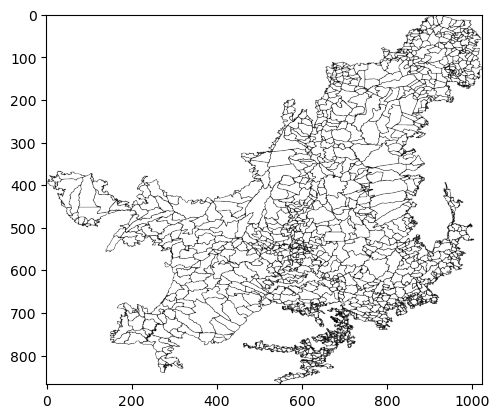

In [44]:
##https://terrabrasilis.dpi.inpe.br/app/map/alerts
# Conectar ao serviço WMS
wms_url = 'https://terrabrasilis.dpi.inpe.br/geoserver/prodes-cerrado-nb/wms'
wms = WebMapService(wms_url)

camada_prodes = list(wms.contents)[5]

styles = list(wms[camada_prodes].styles)

epsg = wms[camada_prodes].boundingBox
epsg = epsg[4]  

# variavel bbox
bbox=wms[camada_prodes].boundingBoxWGS84

# Buscar a imagem do WMS para o município selecionado
img = wms.getmap(
    layers=[camada_municipios],
    styles=[styles[0]],
    srs=epsg,
    bbox=bbox,
    size=(1024, 868),  # Ajustar o tamanho da imagem conforme necessário
    format='image/png',
    transparent=True
)

# Ler os dados brutos da imagem
img_data = img.read()

# Verificar o tamanho dos dados da imagem
print(f"Length of image data: {len(img_data)}")

# Abrir a imagem usando PIL e converter para RGBA
image = Image.open(BytesIO(img_data)).convert('RGBA')

# Converter a imagem PIL para um array NumPy
image_array = np.array(image)

# Verificar as dimensões do array da imagem
print(f"Shape of the image array: {image_array.shape}")

# Exibir a imagem usando matplotlib
plt.imshow(image_array)
plt.show()

Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

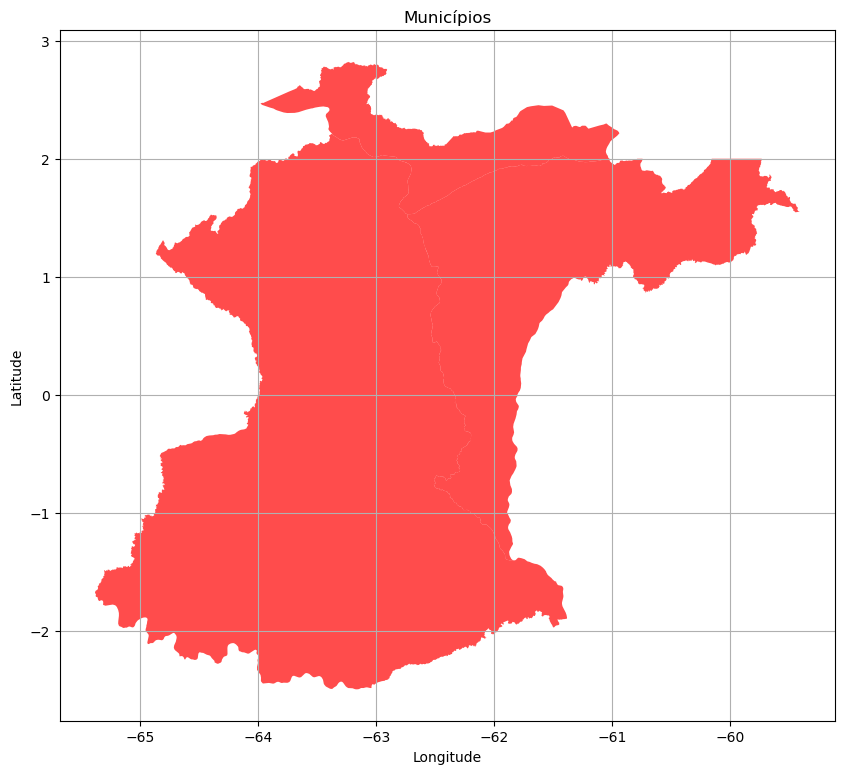

In [46]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Selecionar a camada de interesse
camada_interesse = 'bdqueimadas:municipios'  # Ajuste conforme necessário
print("Camada selecionada:", camada_interesse)

# Definir a bounding box do município (ajuste conforme necessário)
# Usando um exemplo de bounding box para centralizar na cidade de Luziânia
# bbox = (-48.0125, -16.2467, -47.9648, -16.2121)

# Solicitar os dados da camada selecionada
response = wfs.getfeature(typename=camada_interesse, bbox=bbox, srsname='EPSG:4674')
data = response.read()

# Salvar a resposta em um arquivo temporário (GeoJSON)
with open('/tmp/municipios.geojson', 'wb') as f:
    f.write(data)

# Carregar os dados no GeoDataFrame usando geopandas
gdf = gpd.read_file('/tmp/municipios.geojson')

# Verificar os dados carregados
print(gdf.head())

# Plotar os dados
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.7)
plt.title('Municípios')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

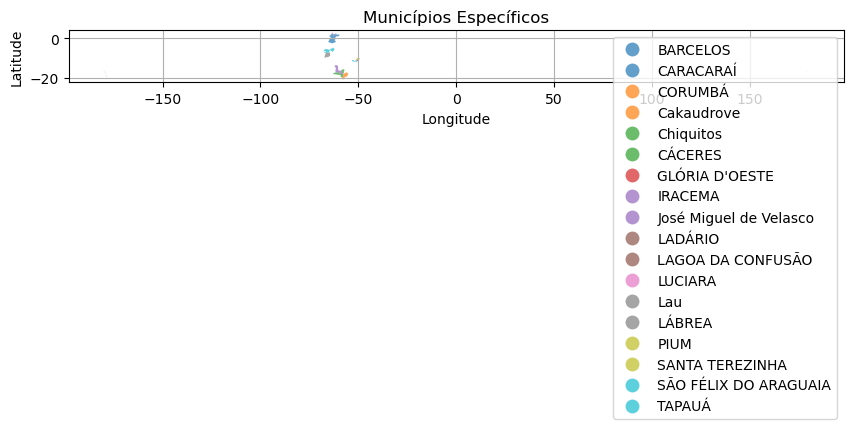

In [60]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import pandas as pd

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Selecionar a camada de interesse
camada_interesse = 'bdqueimadas:municipios'
print("Camada selecionada:", camada_interesse)

# Definir a bounding box dos municípios de interesse
# Bounding boxes podem ser ajustadas conforme necessário
municipios_bbox = {
    'Corumbá-MS': (-57.769, -19.008, -57.491, -18.871),
    'Cáceres-MT': (-58.199, -16.247, -57.836, -15.963),
    'Lagoa da Confusão-TO': (-50.907, -10.858, -49.856, -10.517),
    'Lábrea-AM': (-66.282, -7.370, -65.473, -6.550),
    'Caracaraí-RR': (-61.534, 1.775, -61.097, 2.027)
}

# Solicitar dados para cada município
gdfs = []
for municipio, bbox in municipios_bbox.items():
    response = wfs.getfeature(
        typename=camada_interesse, 
        bbox=bbox, 
        srsname='urn:x-ogc:def:crs:EPSG:4326'
    )
    data = response.read()
    
    # Salvar a resposta em um arquivo temporário (GeoJSON)
    with open(f'/tmp/{municipio}.geojson', 'wb') as f:
        f.write(data)
    
    # Carregar os dados no GeoDataFrame usando geopandas
    gdf = gpd.read_file(f'/tmp/{municipio}.geojson')
    gdfs.append(gdf)

# Concatenar todos os GeoDataFrames
gdf_combined = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Verificar os dados carregados
print(gdf_combined.head())

# Plotar os dados
fig, ax = plt.subplots(figsize=(10, 10))
gdf_combined.plot(ax=ax, column='name_2', legend=True, markersize=5, alpha=0.7)
plt.title('Municípios Específicos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

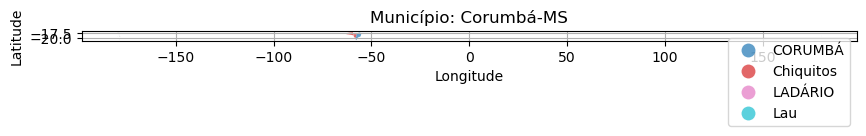

Dados para Cáceres-MT:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_1910020db91_3e65  28080000085  28080000085    28   
1  municipios.fid--775e0a4_1910020db91_3e66  77030000010  77030000010    77   
2  municipios.fid--775e0a4_1910020db91_3e67  33515103437  33515103437    33   
3  municipios.fid--775e0a4_1910020db91_3e68  33515103809  33515103809    33   
4  municipios.fid--775e0a4_1910020db91_3e69  33515103957  33515103957    33   

    name_0  id_1       name_1     id_2                  name_2  estado_gid  \
0  Bolivia     8   Santa Cruz       85  José Miguel de Velasco        2808   
1     Fiji     3     Northern       10              Cakaudrove        7703   
2   Brasil    51  MATO GROSSO  5103437             CURVELÂNDIA        3351   
3   Brasil    51  MATO GROSSO  5103809   FIGUEIRÓPOLIS D'OESTE        3351   
4   Brasil    51  MATO GROSSO  5103957          GLÓRIA D'OESTE        3351   

  complete_id_state   complete_id

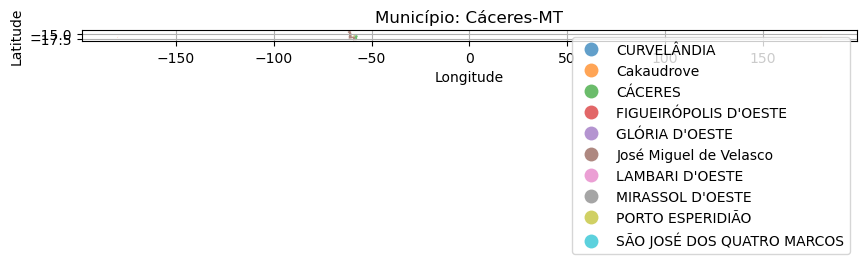

Dados para Lagoa da Confusão-TO:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_1910020db91_3e75  33171706100  33171706100    33   
1  municipios.fid--775e0a4_1910020db91_3e76  33171711902  33171711902    33   
2  municipios.fid--775e0a4_1910020db91_3e77  33171717503  33171717503    33   
3  municipios.fid--775e0a4_1910020db91_3e78  33171718899  33171718899    33   

   name_0  id_1     name_1     id_2                   name_2  estado_gid  \
0  Brasil    17  TOCANTINS  1706100             CRISTALÂNDIA        3317   
1  Brasil    17  TOCANTINS  1711902        LAGOA DA CONFUSÃO        3317   
2  Brasil    17  TOCANTINS  1717503                     PIUM        3317   
3  Brasil    17  TOCANTINS  1718899  SANTA RITA DO TOCANTINS        3317   

  complete_id_state   complete_id  \
0             03317  033171706100   
1             03317  033171711902   
2             03317  033171717503   
3             03317  033171718899   

    

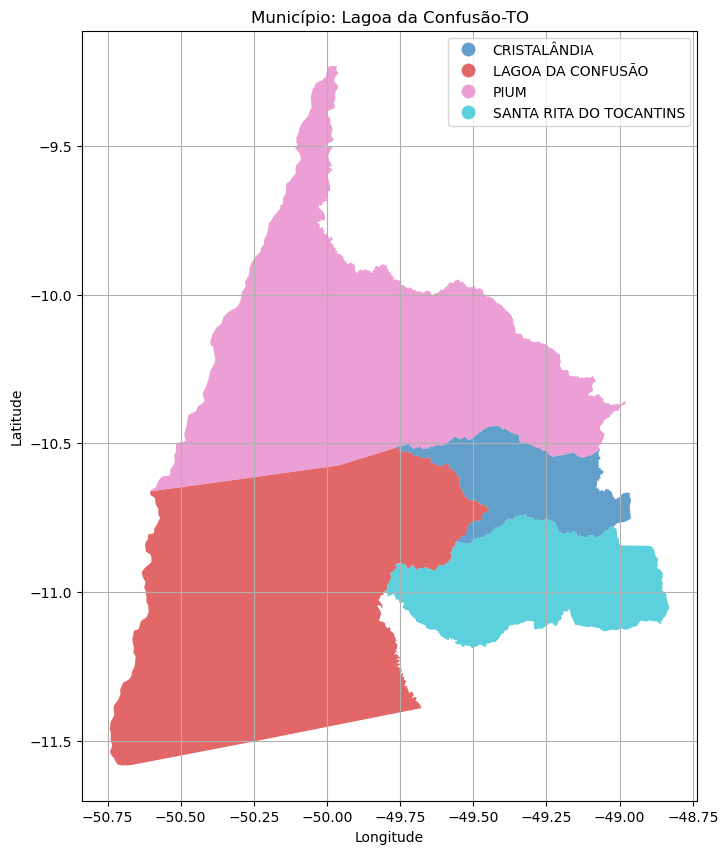

Dados para Lábrea-AM:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_1910020db91_4c76  33131301951  33131301951    33   
1  municipios.fid--775e0a4_1910020db91_4c7e  33131302306  33131302306    33   
2  municipios.fid--775e0a4_1910020db91_4d3b  33131302405  33131302405    33   
3  municipios.fid--775e0a4_1910020db91_5433  33131303502  33131303502    33   
4  municipios.fid--775e0a4_1910020db91_558b  33131304104  33131304104    33   

   name_0  id_1    name_1     id_2     name_2  estado_gid complete_id_state  \
0  Brasil    13  AMAZONAS  1301951  ITAMARATI        3313             03313   
1  Brasil    13  AMAZONAS  1302306      JUTAÍ        3313             03313   
2  Brasil    13  AMAZONAS  1302405     LÁBREA        3313             03313   
3  Brasil    13  AMAZONAS  1303502     PAUINI        3313             03313   
4  Brasil    13  AMAZONAS  1304104     TAPAUÁ        3313             03313   

    complete_id             

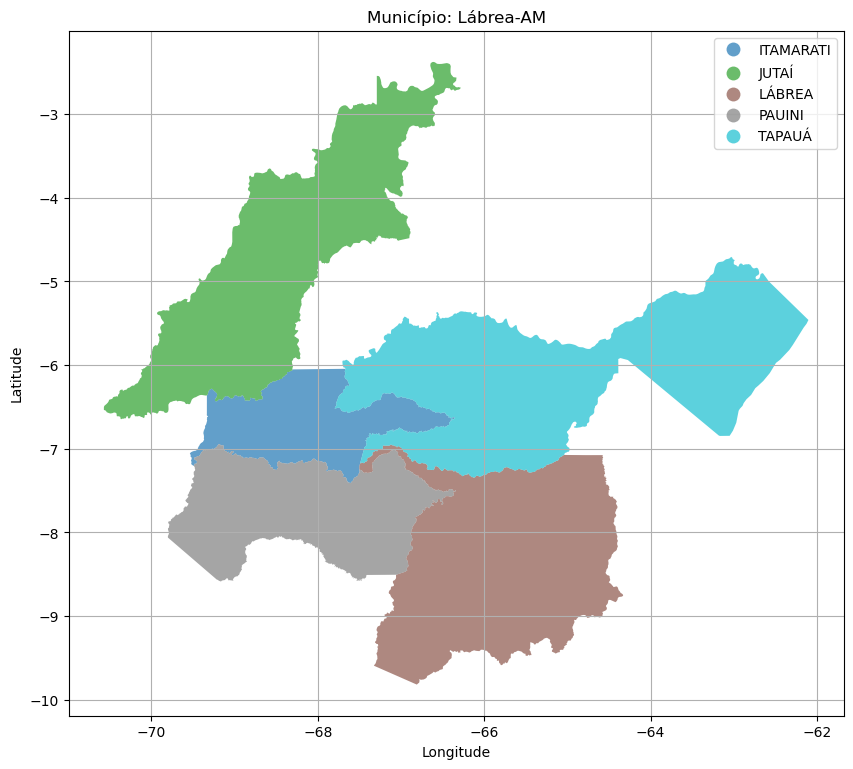

Dados para Caracaraí-RR:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_1910020db91_5f60  33141400175  33141400175    33   
1  municipios.fid--775e0a4_1910020db91_5f61  33141400209  33141400209    33   
2  municipios.fid--775e0a4_1910020db91_5f62  33141400282  33141400282    33   
3  municipios.fid--775e0a4_1910020db91_5f63  33141400472  33141400472    33   
4  municipios.fid--775e0a4_1910020db91_5f64  33131300409  33131300409    33   

   name_0  id_1    name_1     id_2        name_2  estado_gid  \
0  Brasil    14   RORAIMA  1400175         CANTÁ        3314   
1  Brasil    14   RORAIMA  1400209     CARACARAÍ        3314   
2  Brasil    14   RORAIMA  1400282       IRACEMA        3314   
3  Brasil    14   RORAIMA  1400472  RORAINÓPOLIS        3314   
4  Brasil    13  AMAZONAS  1300409      BARCELOS        3313   

  complete_id_state   complete_id  \
0             03314  033141400175   
1             03314  033141400209   
2   

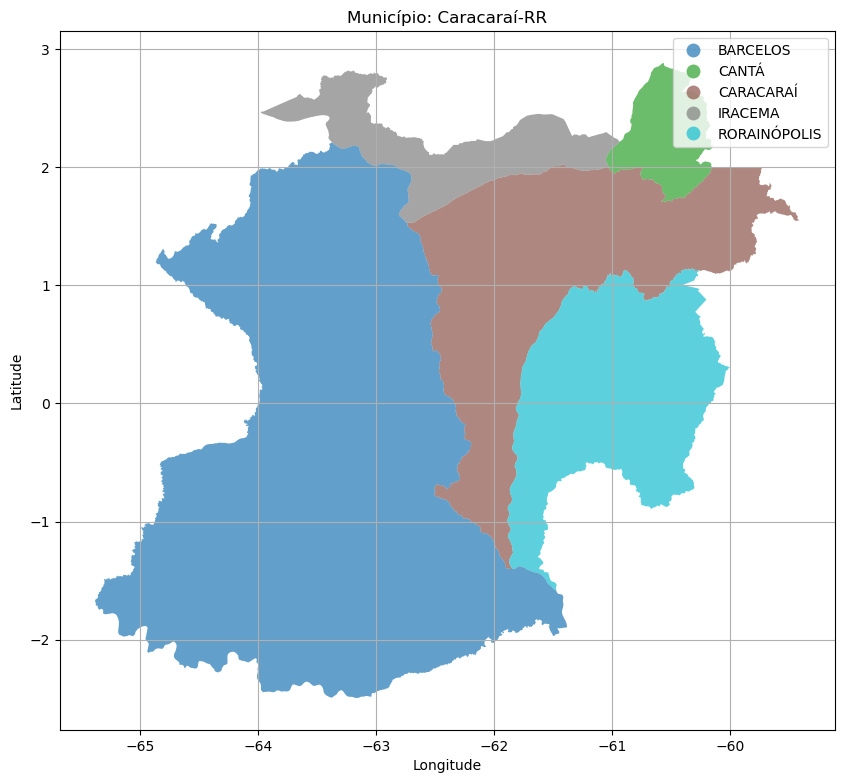

In [61]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Selecionar a camada de interesse
camada_interesse = 'bdqueimadas:municipios'
print("Camada selecionada:", camada_interesse)

# Definir a bounding box dos municípios de interesse
municipios_bbox = {
    'Corumbá-MS': (-58.0533, -19.1874, -57.1919, -18.4103),
    'Cáceres-MT': (-58.7767, -16.6311, -57.7556, -15.6633),
    'Lagoa da Confusão-TO': (-50.0164, -10.9379, -49.4829, -10.4881),
    'Lábrea-AM': (-66.9601, -7.5212, -65.4022, -6.3121),
    'Caracaraí-RR': (-61.5502, 0.9461, -60.6832, 1.9235)
}

# Solicitar dados para cada município e plotar separadamente
for municipio, bbox in municipios_bbox.items():
    response = wfs.getfeature(
        typename=camada_interesse, 
        bbox=bbox, 
        srsname='urn:x-ogc:def:crs:EPSG:4326'
    )
    data = response.read()
    
    # Salvar a resposta em um arquivo temporário (GeoJSON)
    with open(f'/tmp/{municipio}.geojson', 'wb') as f:
        f.write(data)
    
    # Carregar os dados no GeoDataFrame usando geopandas
    gdf = gpd.read_file(f'/tmp/{municipio}.geojson')

    # Verificar os dados carregados
    print(f"Dados para {municipio}:")
    print(gdf.head())

    # Plotar os dados para o município atual
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, column='name_2', legend=True, markersize=5, alpha=0.7)
    plt.title(f'Município: {municipio}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()


Camadas disponíveis:
bdqueimadas:aerodromos_heliportos
bdqueimadas:areas_bancos_areia
bdqueimadas:areas_industriais
bdqueimadas:areas_petroliferas
bdqueimadas:areas_urbanas_reflexo
bdqueimadas:areas_vulcanica
bdqueimadas:assentamentos
bdqueimadas:biomas_brasileiros
bdqueimadas:estados
bdqueimadas:hidrografia
bdqueimadas:labels_aerodromos_heliportos
bdqueimadas:labels_biomas_brasileiros
bdqueimadas:labels_estados
bdqueimadas:labels_hidrografia
bdqueimadas:labels_municipios
bdqueimadas:labels_paises
bdqueimadas:labels_protectedplanet
bdqueimadas:labels_rodovias
bdqueimadas:labels_rppn
bdqueimadas:labels_rppn_e
bdqueimadas:labels_ti
bdqueimadas:labels_uc_e_nao_reservas
bdqueimadas:labels_uc_f_nao_reservas
bdqueimadas:municipios
bdqueimadas:paises
bdqueimadas:protectedplanet
bdqueimadas:regioes_especiais
bdqueimadas:rodovias
bdqueimadas:rppn
bdqueimadas:rppn_10
bdqueimadas:rppn_5
bdqueimadas:rppn_e
bdqueimadas:rppn_e_10
bdqueimadas:rppn_e_5
bdqueimadas:ti
bdqueimadas:ti_10
bdqueimadas:ti_5

/tmp/ipykernel_9958/2239970687.py:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  municipios_com_fogo = municipios[municipios.intersects(focos_fogo.unary_union)]


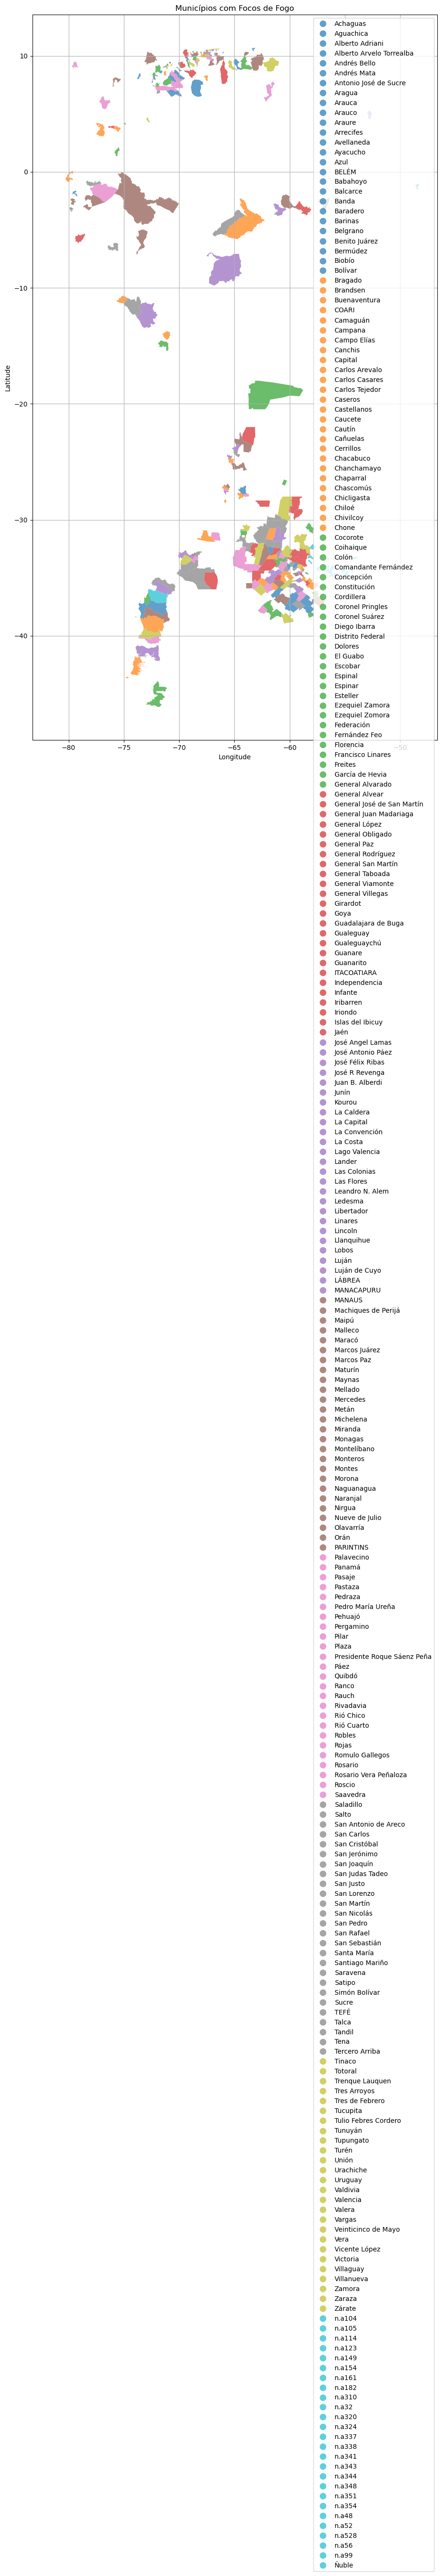

Municípios com focos de fogo: ['Luján' 'Maipú' 'Rosario' 'Carlos Casares' 'Carlos Tejedor' 'Robles'
 'General Taboada' 'Chacabuco' 'Coronel Suárez' 'Dolores'
 'General Juan Madariaga' 'Junín' 'La Costa' 'Mercedes' 'Las Flores'
 'Leandro N. Alem' 'Lincoln' 'Marcos Paz' 'Olavarría' 'Pehuajó' 'Baradero'
 'Benito Juárez' 'Bragado' 'Brandsen' 'Pergamino' 'Rojas' 'Salto'
 'San Antonio de Areco' 'San Nicolás' 'San Pedro' 'Arrecifes' 'Tandil'
 'Azul' 'Balcarce' 'Cañuelas' 'Campana' 'Bolívar' 'Chascomús' 'Chivilcoy'
 'Colón' 'Coronel Pringles' 'Escobar' 'General Alvarado' 'General Paz'
 'General Rodríguez' 'General San Martín' 'General Viamonte'
 'General Villegas' 'Lobos' 'Nueve de Julio' 'Pilar' 'Rauch' 'Rivadavia'
 'Saavedra' 'Saladillo' 'Trenque Lauquen' 'Tres Arroyos'
 'Veinticinco de Mayo' 'Vicente López' 'Tres de Febrero' 'Avellaneda'
 'Ayacucho' 'Tercero Arriba' 'San Justo' 'Santa María' 'Unión' 'Totoral'
 'Capital' 'Comandante Fernández' 'Zárate' 'Presidente Roque Sáenz Peña'
 'Rió Cua

In [62]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Listar todas as camadas disponíveis
print("Camadas disponíveis:")
for layer in list(wfs.contents):
    print(layer)

# Função para carregar dados GeoJSON do WFS
def carregar_dados(typename, bbox=None):
    if bbox:
        response = wfs.getfeature(typename=typename, bbox=bbox, srsname='urn:x-ogc:def:crs:EPSG:4326')
    else:
        response = wfs.getfeature(typename=typename, srsname='urn:x-ogc:def:crs:EPSG:4326')
    data = response.read()
    with open('/tmp/temp_data.geojson', 'wb') as f:
        f.write(data)
    return gpd.read_file('/tmp/temp_data.geojson')

# Ajuste o nome da camada de focos de fogo para o nome correto
nome_focos = 'bdqueimadas:areas_urbanas_reflexo'  # Substitua pelo nome correto se necessário

# Carregar dados dos focos de fogo
focos_fogo = carregar_dados(nome_focos)

# Carregar dados dos municípios
municipios = carregar_dados('bdqueimadas:municipios')

# Verificar interseção entre focos de fogo e municípios
municipios_com_fogo = municipios[municipios.intersects(focos_fogo.unary_union)]

# Plotar municípios com focos de fogo
fig, ax = plt.subplots(figsize=(20, 20))
municipios_com_fogo.plot(ax=ax, column='name_2', legend=True, markersize=5, alpha=0.7)
plt.title('Municípios com Focos de Fogo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Exibir nomes dos municípios com focos de fogo
municipios_nomes = municipios_com_fogo['name_2'].unique()
print("Municípios com focos de fogo:", municipios_nomes)


Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

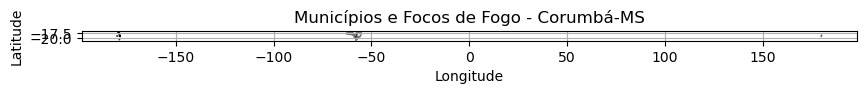

Municípios com focos de fogo: []
Dados para Cáceres-MT:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_191008373b4_317c  28080000085  28080000085    28   
1  municipios.fid--775e0a4_191008373b4_317d  77030000010  77030000010    77   
2  municipios.fid--775e0a4_191008373b4_317e  33515103437  33515103437    33   
3  municipios.fid--775e0a4_191008373b4_317f  33515103809  33515103809    33   
4  municipios.fid--775e0a4_191008373b4_3180  33515103957  33515103957    33   

    name_0  id_1       name_1     id_2                  name_2  estado_gid  \
0  Bolivia     8   Santa Cruz       85  José Miguel de Velasco        2808   
1     Fiji     3     Northern       10              Cakaudrove        7703   
2   Brasil    51  MATO GROSSO  5103437             CURVELÂNDIA        3351   
3   Brasil    51  MATO GROSSO  5103809   FIGUEIRÓPOLIS D'OESTE        3351   
4   Brasil    51  MATO GROSSO  5103957          GLÓRIA D'OESTE        3351   



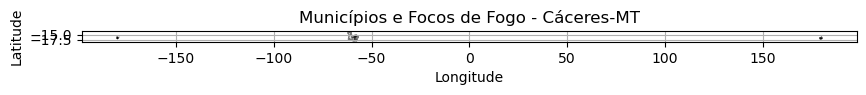

Municípios com focos de fogo: []
Dados para Lagoa da Confusão-TO:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_191008373b4_318e  33171706100  33171706100    33   
1  municipios.fid--775e0a4_191008373b4_318f  33171711902  33171711902    33   
2  municipios.fid--775e0a4_191008373b4_3190  33171717503  33171717503    33   
3  municipios.fid--775e0a4_191008373b4_3191  33171718899  33171718899    33   

   name_0  id_1     name_1     id_2                   name_2  estado_gid  \
0  Brasil    17  TOCANTINS  1706100             CRISTALÂNDIA        3317   
1  Brasil    17  TOCANTINS  1711902        LAGOA DA CONFUSÃO        3317   
2  Brasil    17  TOCANTINS  1717503                     PIUM        3317   
3  Brasil    17  TOCANTINS  1718899  SANTA RITA DO TOCANTINS        3317   

  complete_id_state   complete_id  \
0             03317  033171706100   
1             03317  033171711902   
2             03317  033171717503   
3        

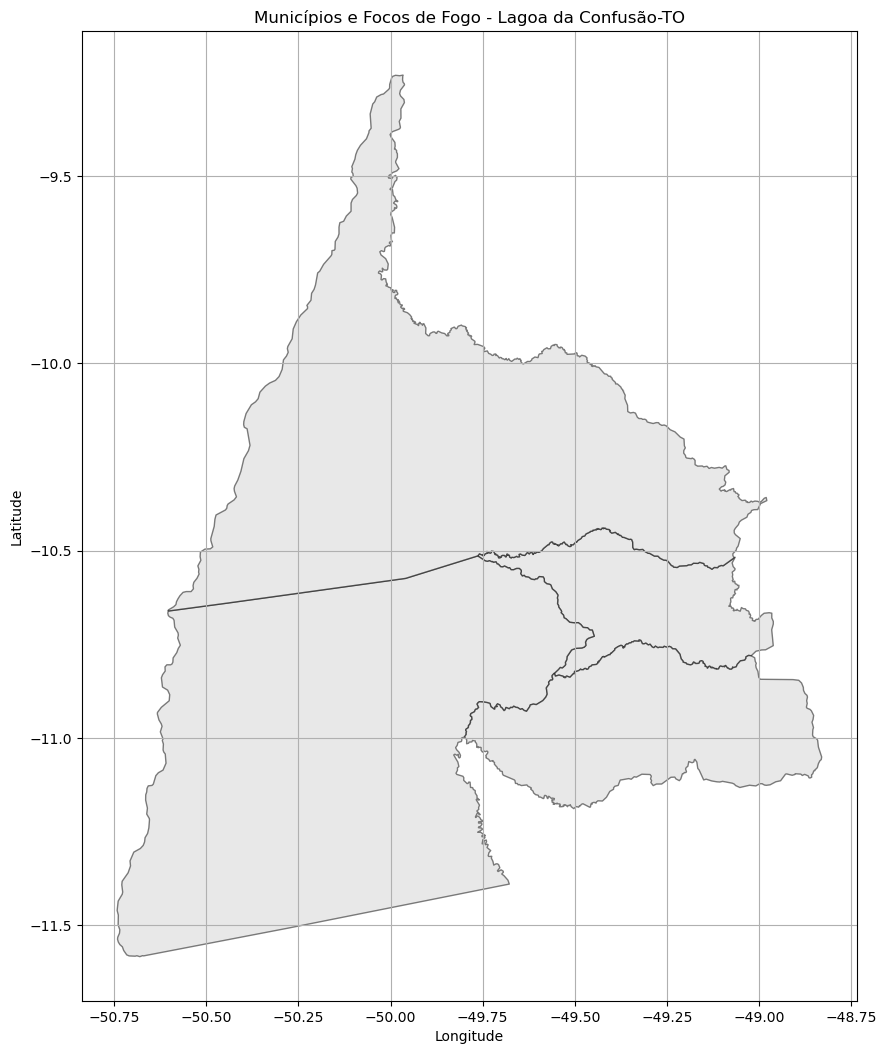

Municípios com focos de fogo: []
Dados para Lábrea-AM:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_191008373b4_319b  33131301951  33131301951    33   
1  municipios.fid--775e0a4_191008373b4_319c  33131302306  33131302306    33   
2  municipios.fid--775e0a4_191008373b4_319d  33131302405  33131302405    33   
3  municipios.fid--775e0a4_191008373b4_319e  33131303502  33131303502    33   
4  municipios.fid--775e0a4_191008373b4_319f  33131304104  33131304104    33   

   name_0  id_1    name_1     id_2     name_2  estado_gid complete_id_state  \
0  Brasil    13  AMAZONAS  1301951  ITAMARATI        3313             03313   
1  Brasil    13  AMAZONAS  1302306      JUTAÍ        3313             03313   
2  Brasil    13  AMAZONAS  1302405     LÁBREA        3313             03313   
3  Brasil    13  AMAZONAS  1303502     PAUINI        3313             03313   
4  Brasil    13  AMAZONAS  1304104     TAPAUÁ        3313             03313

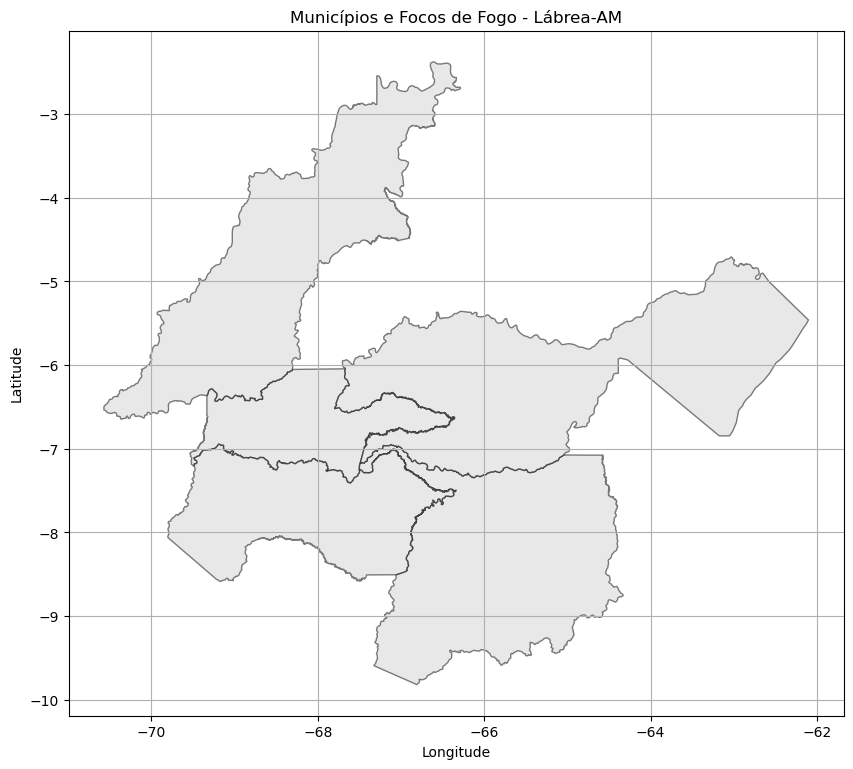

Municípios com focos de fogo: []
Dados para Caracaraí-RR:
                                     gml_id          gid     objectid  id_0  \
0  municipios.fid--775e0a4_191008373b4_31a9  33141400175  33141400175    33   
1  municipios.fid--775e0a4_191008373b4_31aa  33141400209  33141400209    33   
2  municipios.fid--775e0a4_191008373b4_31ab  33141400282  33141400282    33   
3  municipios.fid--775e0a4_191008373b4_31ac  33141400472  33141400472    33   
4  municipios.fid--775e0a4_191008373b4_31ad  33131300409  33131300409    33   

   name_0  id_1    name_1     id_2        name_2  estado_gid  \
0  Brasil    14   RORAIMA  1400175         CANTÁ        3314   
1  Brasil    14   RORAIMA  1400209     CARACARAÍ        3314   
2  Brasil    14   RORAIMA  1400282       IRACEMA        3314   
3  Brasil    14   RORAIMA  1400472  RORAINÓPOLIS        3314   
4  Brasil    13  AMAZONAS  1300409      BARCELOS        3313   

  complete_id_state   complete_id  \
0             03314  033141400175   
1       

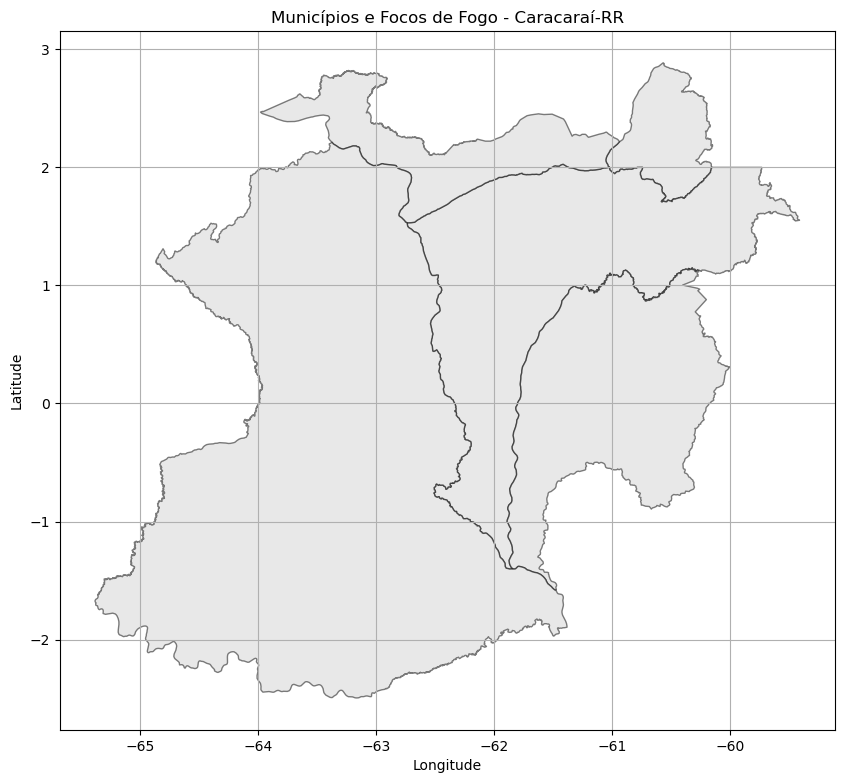

Municípios com focos de fogo: []


In [75]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Definir a camada de interesse
camada_municipios = 'bdqueimadas:municipios'
camada_focos = 'bdqueimadas:areas_urbanas_reflexo'  # Ajuste para a camada correta

# Definir a bounding box dos municípios de interesse
municipios_bbox = {
    'Corumbá-MS': (-58.0533, -19.1874, -57.1919, -18.4103),
    'Cáceres-MT': (-58.7767, -16.6311, -57.7556, -15.6633),
    'Lagoa da Confusão-TO': (-50.0164, -10.9379, -49.4829, -10.4881),
    'Lábrea-AM': (-66.9601, -7.5212, -65.4022, -6.3121),
    'Caracaraí-RR': (-61.5502, 0.9461, -60.6832, 1.9235)
}

# Função para carregar dados do WFS
def carregar_dados(typename, bbox=None):
    try:
        if bbox:
            response = wfs.getfeature(typename=typename, bbox=bbox, srsname='urn:x-ogc:def:crs:EPSG:4326')
        else:
            response = wfs.getfeature(typename=typename, srsname='urn:x-ogc:def:crs:EPSG:4326')
        data = response.read()
        return gpd.read_file(data)
    except Exception as e:
        print(f"Erro ao carregar dados para {typename}: {e}")
        return gpd.GeoDataFrame()  # Retorna um GeoDataFrame vazio em caso de erro

# Carregar e plotar dados dos municípios e focos de fogo
for municipio, bbox in municipios_bbox.items():
    # Carregar dados dos municípios
    municipios_gdf = carregar_dados(camada_municipios, bbox)
    print(f"Dados para {municipio}:")
    print(municipios_gdf.head())
    
    # Carregar dados dos focos de fogo
    focos_fogo_gdf = carregar_dados(camada_focos, bbox)
    print(f"Focos de fogo para {municipio}:")
    print(focos_fogo_gdf.head())
    
    # Verificar interseção entre focos de fogo e municípios
    if not focos_fogo_gdf.empty:
        # Usar `union_all` no lugar de `unary_union`
        focos_fogo_union = focos_fogo_gdf.unary_union
        municipios_com_fogo = municipios_gdf[municipios_gdf.intersects(focos_fogo_union)]
    else:
        municipios_com_fogo = municipios_gdf.iloc[0:0]  # GeoDataFrame vazio se não há focos de fogo
    
    # Plotar municípios e focos de fogo
    fig, ax = plt.subplots(figsize=(10, 30))
    municipios_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
    if not focos_fogo_gdf.empty:
        focos_fogo_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.7)
    if not municipios_com_fogo.empty:
        municipios_com_fogo.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7, markersize=5)
    plt.title(f'Municípios e Focos de Fogo - {municipio}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
    
    # Exibir nomes dos municípios com focos de fogo
    print("Municípios com focos de fogo:", municipios_com_fogo['name_2'].unique())


Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

/tmp/ipykernel_9958/472718005.py:55: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  focos_fogo_union = focos_fogo_gdf.unary_union


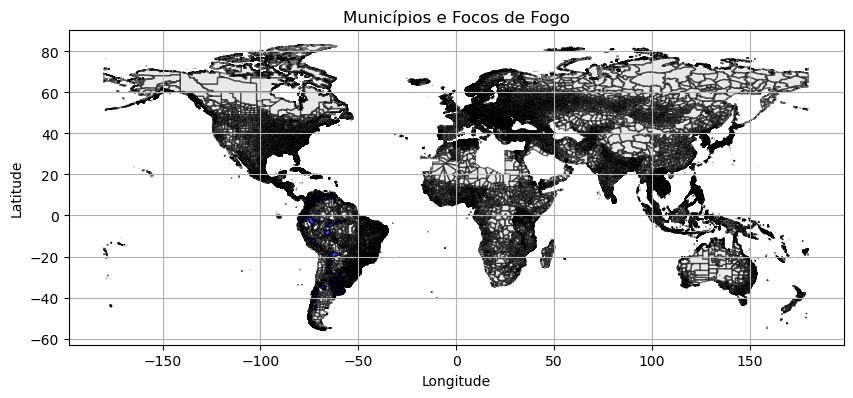

Municípios com focos de fogo: ['Luján' 'Maipú' 'Rosario' 'Carlos Casares' 'Carlos Tejedor' 'Robles'
 'General Taboada' 'Chacabuco' 'Coronel Suárez' 'Dolores'
 'General Juan Madariaga' 'Junín' 'La Costa' 'Mercedes' 'Las Flores'
 'Leandro N. Alem' 'Lincoln' 'Marcos Paz' 'Olavarría' 'Pehuajó' 'Baradero'
 'Benito Juárez' 'Bragado' 'Brandsen' 'Pergamino' 'Rojas' 'Salto'
 'San Antonio de Areco' 'San Nicolás' 'San Pedro' 'Arrecifes' 'Tandil'
 'Azul' 'Balcarce' 'Cañuelas' 'Campana' 'Bolívar' 'Chascomús' 'Chivilcoy'
 'Colón' 'Coronel Pringles' 'Escobar' 'General Alvarado' 'General Paz'
 'General Rodríguez' 'General San Martín' 'General Viamonte'
 'General Villegas' 'Lobos' 'Nueve de Julio' 'Pilar' 'Rauch' 'Rivadavia'
 'Saavedra' 'Saladillo' 'Trenque Lauquen' 'Tres Arroyos'
 'Veinticinco de Mayo' 'Vicente López' 'Tres de Febrero' 'Avellaneda'
 'Ayacucho' 'Tercero Arriba' 'San Justo' 'Santa María' 'Unión' 'Totoral'
 'Capital' 'Comandante Fernández' 'Zárate' 'Presidente Roque Sáenz Peña'
 'Rió Cua

In [77]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Definir a camada de interesse
camada_municipios = 'bdqueimadas:municipios'
camada_focos = 'bdqueimadas:areas_urbanas_reflexo'  # Ajuste para a camada correta

# Função para carregar dados do WFS
def carregar_dados(typename, bbox=None):
    try:
        if bbox:
            response = wfs.getfeature(typename=typename, bbox=bbox, srsname='urn:x-ogc:def:crs:EPSG:4326')
        else:
            response = wfs.getfeature(typename=typename, srsname='urn:x-ogc:def:crs:EPSG:4326')
        data = response.read()
        return gpd.read_file(data)
    except Exception as e:
        print(f"Erro ao carregar dados para {typename}: {e}")
        return gpd.GeoDataFrame()  # Retorna um GeoDataFrame vazio em caso de erro

# Função para obter o bbox da camada
def obter_bbox(typename):
    try:
        layer = wfs[typename]
        return layer.boundingBoxWGS84
    except Exception as e:
        print(f"Erro ao obter bbox para {typename}: {e}")
        return None

# Obter bbox para a camada de municípios
bbox_municipios = obter_bbox(camada_municipios)
print(f"Bounding Box para a camada de municípios: {bbox_municipios}")

# Carregar e plotar dados dos municípios e focos de fogo
if bbox_municipios:
    municipios_gdf = carregar_dados(camada_municipios, bbox=bbox_municipios)
    print(f"Dados para a camada de municípios:")
    print(municipios_gdf.head())

    focos_fogo_gdf = carregar_dados(camada_focos, bbox=bbox_municipios)
    print(f"Focos de fogo para a camada de municípios:")
    print(focos_fogo_gdf.head())

    # Verificar interseção entre focos de fogo e municípios
    if not focos_fogo_gdf.empty:
        focos_fogo_union = focos_fogo_gdf.unary_union
        municipios_com_fogo = municipios_gdf[municipios_gdf.intersects(focos_fogo_union)]
    else:
        municipios_com_fogo = municipios_gdf.iloc[0:0]  # GeoDataFrame vazio se não há focos de fogo
    
    # Plotar municípios e focos de fogo
    fig, ax = plt.subplots(figsize=(10, 30))
    municipios_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
    if not focos_fogo_gdf.empty:
        focos_fogo_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.7)
    if not municipios_com_fogo.empty:
        municipios_com_fogo.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7, markersize=5)
    plt.title('Municípios e Focos de Fogo')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
    
    # Exibir nomes dos municípios com focos de fogo
    if not municipios_com_fogo.empty:
        print("Municípios com focos de fogo:", municipios_com_fogo['name_2'].unique())
    else:
        print("Nenhum foco de fogo encontrado.")
else:
    print("Não foi possível obter o bbox da camada de municípios.")


Camadas disponíveis: ['bdqueimadas:aerodromos_heliportos', 'bdqueimadas:areas_bancos_areia', 'bdqueimadas:areas_industriais', 'bdqueimadas:areas_petroliferas', 'bdqueimadas:areas_urbanas_reflexo', 'bdqueimadas:areas_vulcanica', 'bdqueimadas:assentamentos', 'bdqueimadas:biomas_brasileiros', 'bdqueimadas:estados', 'bdqueimadas:hidrografia', 'bdqueimadas:labels_aerodromos_heliportos', 'bdqueimadas:labels_biomas_brasileiros', 'bdqueimadas:labels_estados', 'bdqueimadas:labels_hidrografia', 'bdqueimadas:labels_municipios', 'bdqueimadas:labels_paises', 'bdqueimadas:labels_protectedplanet', 'bdqueimadas:labels_rodovias', 'bdqueimadas:labels_rppn', 'bdqueimadas:labels_rppn_e', 'bdqueimadas:labels_ti', 'bdqueimadas:labels_uc_e_nao_reservas', 'bdqueimadas:labels_uc_f_nao_reservas', 'bdqueimadas:municipios', 'bdqueimadas:paises', 'bdqueimadas:protectedplanet', 'bdqueimadas:regioes_especiais', 'bdqueimadas:rodovias', 'bdqueimadas:rppn', 'bdqueimadas:rppn_10', 'bdqueimadas:rppn_5', 'bdqueimadas:rppn

/tmp/ipykernel_9958/3439773666.py:60: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  focos_fogo_union = focos_fogo_gdf.unary_union


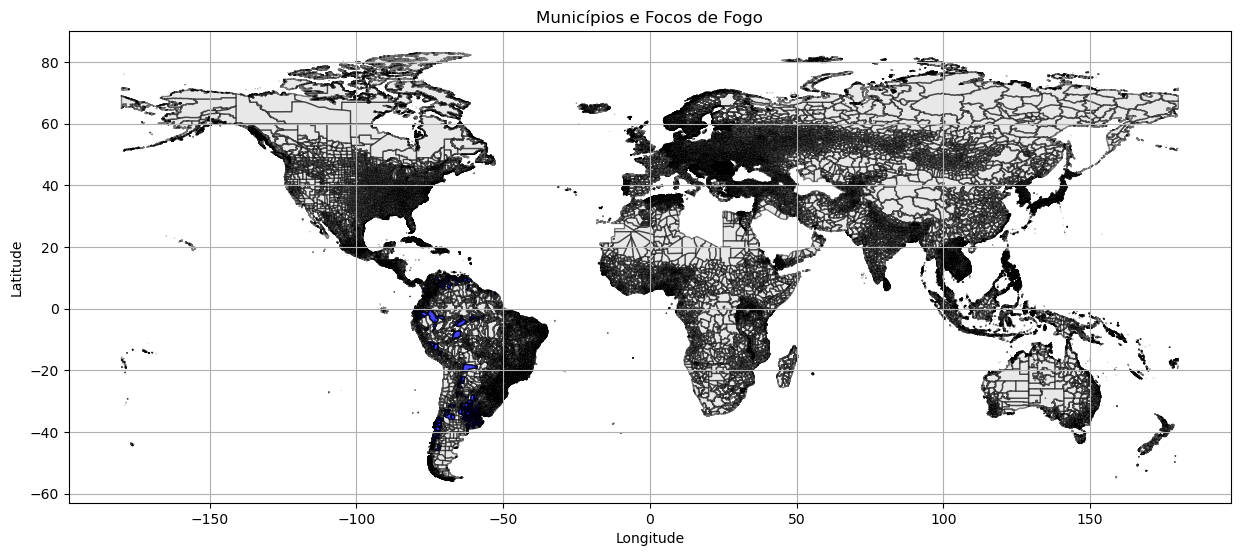

Municípios com focos de fogo: ['Luján' 'Maipú' 'Rosario' 'Carlos Casares' 'Carlos Tejedor' 'Robles'
 'General Taboada' 'Chacabuco' 'Coronel Suárez' 'Dolores'
 'General Juan Madariaga' 'Junín' 'La Costa' 'Mercedes' 'Las Flores'
 'Leandro N. Alem' 'Lincoln' 'Marcos Paz' 'Olavarría' 'Pehuajó' 'Baradero'
 'Benito Juárez' 'Bragado' 'Brandsen' 'Pergamino' 'Rojas' 'Salto'
 'San Antonio de Areco' 'San Nicolás' 'San Pedro' 'Arrecifes' 'Tandil'
 'Azul' 'Balcarce' 'Cañuelas' 'Campana' 'Bolívar' 'Chascomús' 'Chivilcoy'
 'Colón' 'Coronel Pringles' 'Escobar' 'General Alvarado' 'General Paz'
 'General Rodríguez' 'General San Martín' 'General Viamonte'
 'General Villegas' 'Lobos' 'Nueve de Julio' 'Pilar' 'Rauch' 'Rivadavia'
 'Saavedra' 'Saladillo' 'Trenque Lauquen' 'Tres Arroyos'
 'Veinticinco de Mayo' 'Vicente López' 'Tres de Febrero' 'Avellaneda'
 'Ayacucho' 'Tercero Arriba' 'San Justo' 'Santa María' 'Unión' 'Totoral'
 'Capital' 'Comandante Fernández' 'Zárate' 'Presidente Roque Sáenz Peña'
 'Rió Cua

In [79]:
from owslib.wfs import WebFeatureService
import geopandas as gpd
import matplotlib.pyplot as plt

# URL do serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/queimadas/geoserver/wfs'
wfs = WebFeatureService(wfs_url, version='1.1.0')

# Verificar as camadas disponíveis
camadas_disponiveis = list(wfs.contents)
print("Camadas disponíveis:", camadas_disponiveis)

# Definir a camada de interesse
camada_municipios = 'bdqueimadas:municipios'
camada_focos = 'bdqueimadas:areas_urbanas_reflexo'

# Função para carregar dados do WFS
def carregar_dados(typename, bbox=None):
    try:
        if bbox:
            response = wfs.getfeature(typename=typename, bbox=bbox, srsname='urn:x-ogc:def:crs:EPSG:4326')
        else:
            response = wfs.getfeature(typename=typename, srsname='urn:x-ogc:def:crs:EPSG:4326')
        data = response.read()
        return gpd.read_file(data)
    except Exception as e:
        print(f"Erro ao carregar dados para {typename}: {e}")
        return gpd.GeoDataFrame()  # Retorna um GeoDataFrame vazio em caso de erro

# Função para obter o bbox da camada
def obter_bbox(typename):
    try:
        layer = wfs[typename]
        return layer.boundingBoxWGS84
    except Exception as e:
        print(f"Erro ao obter bbox para {typename}: {e}")
        return None

# Obter bbox para a camada de municípios
bbox_municipios = obter_bbox(camada_municipios)
print(f"Bounding Box para a camada de municípios: {bbox_municipios}")

# Carregar e plotar dados dos municípios e focos de fogo
if bbox_municipios:
    municipios_gdf = carregar_dados(camada_municipios, bbox=bbox_municipios)
    print(f"Dados para a camada de municípios:")
    print(municipios_gdf.head())

    focos_fogo_gdf = carregar_dados(camada_focos, bbox=bbox_municipios)
    print(f"Focos de fogo para a camada de municípios:")
    print(focos_fogo_gdf.head())

    # Verificar se as geometrias dos focos de fogo estão no mesmo CRS que os municípios
    if not municipios_gdf.empty and not focos_fogo_gdf.empty:
        # Garantir que ambos os GeoDataFrames estão no mesmo CRS
        if municipios_gdf.crs != focos_fogo_gdf.crs:
            focos_fogo_gdf = focos_fogo_gdf.to_crs(municipios_gdf.crs)

        # Verificar interseção entre focos de fogo e municípios
        focos_fogo_union = focos_fogo_gdf.unary_union
        municipios_com_fogo = municipios_gdf[municipios_gdf.intersects(focos_fogo_union)]

        # Plotar municípios e focos de fogo
        fig, ax = plt.subplots(figsize=(15, 15))
        municipios_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
        if not focos_fogo_gdf.empty:
            focos_fogo_gdf.plot(ax=ax, color='red', edgecolor='black', alpha=0.7)
        if not municipios_com_fogo.empty:
            municipios_com_fogo.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7, markersize=5)
        plt.title('Municípios e Focos de Fogo')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True)
        plt.show()

        # Exibir nomes dos municípios com focos de fogo
        if not municipios_com_fogo.empty:
            print("Municípios com focos de fogo:", municipios_com_fogo['name_2'].unique())
        else:
            print("Nenhum foco de fogo encontrado.")
    else:
        print("Dados de municípios ou focos de fogo não carregados corretamente.")
else:
    print("Não foi possível obter o bbox da camada de municípios.")


c) Focos de Fogo Ativo

In [53]:
import folium
import rasterio
from pyproj import Transformer
from shapely import MultiPoint, Point
from pystac_client import Client



# Endereço do ponto de acesso ao serviço
datainpe = "https://data.inpe.br/bdc/stac/v1/"

# Cria um objeto para o catálogo
catalogo = Client.open(datainpe)

# Mostra algumas informações básicas do catálogo
print(f"ID: {catalogo.id}")
print(f"Título: {catalogo.title or 'N/A'}")
print(f"Descrição: {catalogo.description or 'N/A'}")

# Lista as coleções disponíveis no catálogo
collections = list(catalogo.get_collections())
print(f"Esse catálogo possui {len(collections)} coleções")
print("IDs coleções:")
for collection in collections:
    print(f"- {collection.id}")

# Consulta uma coleção em particular
name_sat = "CB4A-WPM-PCA-FUSED-1"  #input("CB4A-WPM-PCA-FUSED-1 or S2_L2A-1")  #"S2_L2A-1"
# if name_sat != "CB4A-WPM-PCA-FUSED-1" or name_sat != "S2_L2A-1":
#     print('coleções diferentes')

satellite = catalogo.get_collection(name_sat)

print(f"ID: {satellite.id}")
print(f"Título: {satellite.title or 'N/A'}")
print(f"Descrição: {satellite.description or 'N/A'}")
print(f"Palavras chave: {satellite.keywords or 'N/A'}")

print(f"Ponto central do município: Latitude = {center_lat}, Longitude = {center_lon}")

# Define o raio do buffer ao redor do ponto central (em graus)
buffer_radius = 0.05  # Ajuste conforme necessário

# Cria um ponto e um buffer ao redor do ponto central
center_point = Point(center_lon, center_lat)
buffer_area = center_point.buffer(buffer_radius)

# Converte o buffer para uma caixa delimitadora
bbox = buffer_area.bounds
print(f"Bounding box ajustado com buffer ao redor do ponto central: {bbox}")



ID: INPE
Título: N/A
Descrição: This is the landing page for the INPE STAC server. The SpatioTemporal Asset Catalogs (STAC) provide a standardized way to expose collections of spatial temporal data. Here you will find collections of data provided by projects and areas of INPE.
Esse catálogo possui 35 coleções
IDs coleções:
- GOES16-L2-CMI-1
- mod13q1-6.1
- S2_L1C_BUNDLE-1
- mosaic-cbers4a-paraiba-3m-1
- mosaic-s2-paraiba-3m-1
- LANDSAT-16D-1
- mosaic-s2-yanomami_territory-6m-1
- CB4-WFI-L4-SR-1
- myd13q1-6.0
- S2_L2A-1
- mosaic-s2-cerrado-2m-1
- S2-16D-2
- CBERS4-MUX-2M-1
- mod13q1-6.0
- S2_L2A_BUNDLE-1
- CBERS-WFI-8D-1
- mosaic-landsat-amazon-3m-1
- landsat-2
- CB4A-WPM-PCA-FUSED-1
- mosaic-landsat-brazil-6m-1
- sentinel-3-olci-l1-bundle-1
- sentinel-1-grd-bundle-1
- mosaic-s2-amazon-3m-1
- charter-wfi-1
- mosaic-s2-cerrado-4m-1
- mosaic-cbers4-brazil-3m-1
- charter-mux-1
- mosaic-s2-amazon-1m-1
- myd13q1-6.1
- charter-wpm-1
- charter-pan-1
- CBERS4-WFI-16D-2
- CB4A-WFI-L4-SR-1
- CB4-

d) Imagem Mais Recente de 2024

In [54]:
# Consulta com parâmetros
intervalo = "2024-06-01/2024-06-30"  # Período de consulta
search = catalogo.search(collections=[satellite.id], bbox=bbox, datetime=intervalo)  #com buffer pega uma data mais atual
items = search.item_collection()
print(f"A coleção {satellite.id} possui {len(items)} itens.")
# Apresenta os resultados
for i in items:
    print(f"ID: {i.id}")
    print(f"Data: {i.datetime or 'N/A'}")
    print(f"Geometria: {i.geometry or 'N/A'}")

# Verifica se não há itens e evita a execução do código subsequente
if len(items) == 0:
    print("Nenhum item encontrado.")
    # Utilize sys.exit() para encerrar o programa
    import sys
    sys.exit()

# Recupera os ativos da 1ª imagem
primeiro = items[0]
ativos = primeiro.assets
print(ativos.keys())

print(ativos["thumbnail"].href)
if satellite.id == 'S2_L2A-1':
    print(ativos["TCI"].href)
    src_imgs = ativos["TCI"].href
    src_imgs = [str(src_imgs)]
    print(src_imgs)
else:
    print(ativos["tci"].href)
    src_imgs = ativos["tci"].href
    src_imgs = [str(src_imgs)]
    print(src_imgs)

# Ponto de entrada ao serviço TMS do INPE
inpe_tms_endpoint = 'https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}?url='

# Fórmula de realce opcional
color_enh = '&color_formula=gamma rg 1.3'

# Cria uma marca no centro de cada imagem
marks = []
for img in src_imgs:
    # Calcula o bounding box da imagem em EPSG
    with rasterio.open(img) as src:
        xmin, ymin, xmax, ymax = src.bounds
        transformer = Transformer.from_crs(src.crs, epsg, always_xy=True)
        center_lon, center_lat = transformer.transform(
            xmin + (xmax - xmin) / 2.0,
            ymin + (ymax - ymin) / 2.0
        )
        marks.append(Point(center_lat, center_lon))

# Cria um mapa centralizado no centroide de todas as marcas
zoom = 10  # Ajuste o nível de zoom conforme necessário
points = MultiPoint(marks)
center = points.centroid
map_center = [center.x, center.y]  # Note que center.x é latitude e center.y é longitude
map = folium.Map(location=map_center, zoom_start=zoom)

# Adiciona as imagens ao mapa
for i, img in enumerate(src_imgs):
    # Cria um layer TMS para cada imagem
    folium.TileLayer(
        tiles=inpe_tms_endpoint + img + color_enh,
        opacity=1,
        attr="INPE"
    ).add_to(map)

    # Cria uma marca com o identificador para cada imagem
    img_id = img[img.rfind('/') + 1:]
    folium.Marker(
        location=[marks[i].x, marks[i].y],
        popup=img_id
    ).add_to(map)

# Mostra o mapa
map

# # Ou salva para um arquivo HTML
# map.save("index.html")

A coleção CB4A-WPM-PCA-FUSED-1 possui 3 itens.
ID: CBERS4A_WPM_PCA_RGB321_20240611_218_133
Data: 2024-06-11 00:00:00+00:00
Geometria: {'type': 'Polygon', 'coordinates': [[[-57.687027, -16.415765], [-57.687027, -15.366164], [-56.62959, -15.366164], [-56.62959, -16.415765], [-57.687027, -16.415765]]]}
ID: CBERS4A_WPM_PCA_RGB321_20240611_218_134
Data: 2024-06-11 00:00:00+00:00
Geometria: {'type': 'Polygon', 'coordinates': [[[-57.861252, -17.208973], [-57.861252, -16.158804], [-56.799482, -16.158804], [-56.799482, -17.208973], [-57.861252, -17.208973]]]}
ID: CBERS4A_WPM_PCA_RGB321_20240606_219_133
Data: 2024-06-06 00:00:00+00:00
Geometria: {'type': 'Polygon', 'coordinates': [[[-58.452884, -16.416492], [-58.452884, -15.365869], [-57.396083, -15.365869], [-57.396083, -16.416492], [-58.452884, -16.416492]]]}
dict_keys(['tci', 'thumbnail'])
https://data.inpe.br/bdc/data/CB4A-WPM-PCA-FUSED/v001/218/133/2024/6/CBERS4A_WPM_PCA_RGB321_20240611_218_133.png
https://data.inpe.br/bdc/data/CB4A-WPM-PCA

### Tentativa de criar vídeo

### Importações e Configuração Inicial

Esta seção configura as importações necessárias e conecta aos serviços WFS e WMS para obter os dados de municípios e imagens de satélite.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
import geopandas as gpd
import requests
import os
from moviepy.editor import ImageSequenceClip
import folium
import rasterio
from pyproj import Transformer
from shapely import MultiPoint, Point
from pystac_client import Client

# Conectar ao serviço WFS
wfs_url = 'https://terrabrasilis.dpi.inpe.br/geoserver/prodes-cerrado-nb/wfs'
wfs = WebFeatureService(wfs_url, version='1.0.0')

# Selecionar a camada de municípios do bioma Cerrado
camada_municipios =  camada = list(wfs.contents)[6]

# Obter a URL do GetFeature para a camada de municípios
feature_info_url = f"{wfs_url}?service=WFS&version=1.1.0&request=GetFeature&typeName={camada_municipios}&outputFormat=application/json"

# Fazer a solicitação GetFeature para obter os dados dos municípios
response = requests.get(feature_info_url)
municipios_geojson = response.json()

# Converter os dados GeoJSON em um GeoDataFrame
municipios_gdf = gpd.GeoDataFrame.from_features(municipios_geojson["features"])

# Identificar a coluna que contém os nomes dos municípios
coluna_nome_municipio = 'nome'

# Listar os municípios disponíveis
municipios_nomes = municipios_gdf[coluna_nome_municipio].tolist()


### Seleção do Município e Extração de Imagens

Esta seção seleciona um município específico e obtém as imagens do serviço WMS.



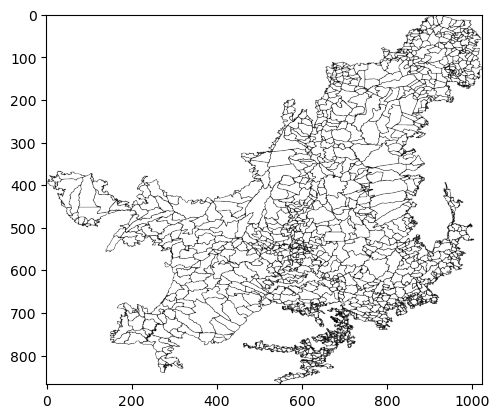

In [4]:
# Selecionar um município específico pelo nome
nome_municipio = 'Cáceres'

# Verificar se o município está na lista de municípios disponíveis
if nome_municipio not in municipios_nomes:
    raise ValueError(f"O município '{nome_municipio}' não está disponível na lista.")

# Obter a geometria do município selecionado
municipio_selecionado = municipios_gdf[municipios_gdf[coluna_nome_municipio] == nome_municipio].geometry.iloc[0]

# Calcular a bounding box do município selecionado
bbox_municipio = municipio_selecionado.bounds

# Calcular o ponto central da bounding box
center_lon = (bbox_municipio[0] + bbox_municipio[2]) / 2
center_lat = (bbox_municipio[1] + bbox_municipio[3]) / 2

# Conectar ao serviço WMS
wms_url = 'https://terrabrasilis.dpi.inpe.br/geoserver/prodes-cerrado-nb/wms'
wms = WebMapService(wms_url)

camada_prodes = list(wms.contents)[5]

styles = list(wms[camada_prodes].styles)

epsg = wms[camada_prodes].boundingBox
epsg = epsg[4]  

# Variável bbox
bbox=wms[camada_prodes].boundingBoxWGS84

# Buscar a imagem do WMS para o município selecionado
img = wms.getmap(
    layers=[camada_municipios],
    styles=[styles[0]],
    srs=epsg,
    bbox=bbox,
    size=(1024, 868),  # Ajustar o tamanho da imagem conforme necessário
    format='image/png',
    transparent=True
)

# Ler os dados brutos da imagem
img_data = img.read()

# Abrir a imagem usando PIL e converter para RGBA
image = Image.open(BytesIO(img_data)).convert('RGBA')

# Converter a imagem PIL para um array NumPy
image_array = np.array(image)

# Exibir a imagem usando matplotlib
plt.imshow(image_array)
plt.show()

### Consulta de Imagens de Satélite

Esta seção consulta imagens de satélite usando o STAC e obtém URLs das imagens.

In [5]:
# Endereço do ponto de acesso ao serviço
datainpe = "https://data.inpe.br/bdc/stac/v1/"

# Cria um objeto para o catálogo
catalogo = Client.open(datainpe)

# Consulta uma coleção em particular
name_sat = "CB4A-WPM-PCA-FUSED-1" 

satellite = catalogo.get_collection(name_sat)

# Define o raio do buffer ao redor do ponto central (em graus)
buffer_radius = 0.05  

# Cria um ponto e um buffer ao redor do ponto central
center_point = Point(center_lon, center_lat)
buffer_area = center_point.buffer(buffer_radius)

# Converte o buffer para uma caixa delimitadora
bbox = buffer_area.bounds

# Consulta com parâmetros
intervalo = "2024-06-01/2024-06-30"  
search = catalogo.search(collections=[satellite.id], bbox=bbox, datetime=intervalo)  
items = search.item_collection()

# Verifica se não há itens e evita a execução do código subsequente
if len(items) == 0:
    print("Nenhum item encontrado.")
    import sys
    sys.exit()

# Recupera os ativos da 1ª imagem
primeiro = items[0]
ativos = primeiro.assets

if satellite.id == 'S2_L2A-1':
    src_imgs = [ativos["TCI"].href]
else:
    src_imgs = [ativos["tci"].href]


### Criação do Mapa Interativo

Esta seção cria um mapa interativo com as imagens de satélite.

In [7]:
# Ponto de entrada ao serviço TMS do INPE
inpe_tms_endpoint = 'https://data.inpe.br/bdc/tms/tiles/WebMercatorQuad/{z}/{x}/{y}?url='

# Fórmula de realce opcional
color_enh = '&color_formula=gamma rg 1.3'

# Cria uma marca no centro de cada imagem
marks = []
for img in src_imgs:
    with rasterio.open(img) as src:
        xmin, ymin, xmax, ymax = src.bounds
        transformer = Transformer.from_crs(src.crs, epsg, always_xy=True)
        center_lon, center_lat = transformer.transform(
            xmin + (xmax - xmin) / 2.0,
            ymin + (ymax - ymin) / 2.0
        )
        marks.append(Point(center_lat, center_lon))

# Cria um mapa centralizado no centroide de todas as marcas
zoom = 10  
points = MultiPoint(marks)
center = points.centroid
map_center = [center.x, center.y]  
map = folium.Map(location=map_center, zoom_start=zoom)

# Adiciona as imagens ao mapa
for i, img in enumerate(src_imgs):
    folium.TileLayer(
        tiles=inpe_tms_endpoint + img + color_enh,
        opacity=1,
        attr="INPE"
    ).add_to(map)

    img_id = img[img.rfind('/') + 1:]
    folium.Marker(
        location=[marks[i].x, marks[i].y],
        popup=img_id
    ).add_to(map)

# Mostra o mapa
map


### Criação e Salvamento do Vídeo

Esta seção cria e salva o vídeo a partir das imagens obtidas.

In [8]:
import os
from moviepy.editor import ImageSequenceClip
from PIL import Image
import rasterio

# URLs das imagens TIFF
tiff_urls = [
    "https://data.inpe.br/bdc/data/CB4A-WPM-PCA-FUSED/v001/218/133/2024/6/CBERS4A_WPM_PCA_RGB321_20240611_218_133.tif",
    "https://data.inpe.br/bdc/data/CB4A-WPM-PCA-FUSED/v001/218/134/2024/6/CBERS4A_WPM_PCA_RGB321_20240611_218_134.tif",
    "https://data.inpe.br/bdc/data/CB4A-WPM-PCA-FUSED/v001/219/133/2024/6/CBERS4A_WPM_PCA_RGB321_20240606_219_133.tif"
]

# Diretório para salvar as imagens
image_dir = "images"
os.makedirs(image_dir, exist_ok=True)

# Função para baixar e salvar as imagens em PNG
def convert_tiff_to_png(url, png_filename):
    with rasterio.open(url) as src:
        image = src.read()
        image = image.transpose(1, 2, 0)  # Transpor para (altura, largura, canais)
        img = Image.fromarray(image)
        img.save(png_filename)
        return png_filename

# Converter as imagens TIFF para PNG e armazenar os caminhos
frame_files = []
for idx, url in enumerate(tiff_urls):
    png_path = os.path.join(image_dir, f"image_{idx}.png")
    convert_tiff_to_png(url, png_path)
    frame_files.append(png_path)

# Verificar se pelo menos uma imagem foi baixada com sucesso
if not frame_files:
    raise Exception("Nenhuma imagem válida foi convertida. O vídeo não pode ser criado.")

# Criar e salvar o vídeo
clip = ImageSequenceClip(frame_files, fps=2)
clip.write_videofile("output_video.mp4", codec="libx264")
